In [1]:
%load_ext google.cloud.bigquery
%matplotlib inline
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [2]:
sql = '''
SELECT *  FROM `eth-tokens.alldata.clean_avg`
'''

df = client.query(sql).to_dataframe()
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns
0,0x0bcab166dc40a6c7eeff3b45e0c775efbc0fe823,3,3,0.02001,0.00667,4.109595,1.369865,0.044683678,0.014894559,9.147165,...,0.02001,4.109595,0.044683678,9.147165,0,0,266014.0,375097.520002,223173.5,314156.936279
1,0x0414a9c3498f00de75bfe820126df680574814a2,3,3,1.6450228,0.548340933,346.022462,115.340821,1.6453,0.548433333,346.078500,...,1.6450228,346.022462,1.6453,346.078500,0,0,78084.0,109679.332830,51639.0,72986.147741
2,0x0711b608c2868363c58b92572affc1a4403204ab,3,3,5.99685,1.99895,1199.290042,399.763347,6,2,1199.920000,...,5.99685,1199.290042,6,1199.920000,0,0,4396.0,4542.453962,4397.0,4558.010312
3,0x02a5aac67ce9752b0082166cfda8c51d80122a93,3,3,7.91324736,2.63774912,1636.544286,545.514762,7.91941536,2.63980512,1645.615484,...,7.91324736,1636.544286,7.91941536,1645.615484,0,0,335437.0,217104.409241,300557.0,270085.091928
4,0x0272ab3d04f274a19bed344469dcb2039b1bbad0,3,3,9.58169278,3.193897593,1926.111883,642.037294,9.58574278,3.195247593,1926.926014,...,9.58169278,1926.111883,9.58574278,1926.926014,0,0,5628.0,7670.694362,5653.0,7618.368461


In [3]:
data = df.iloc[:,1:]


In [4]:
cl = cluster.KMeans(4)

fit_cl = cl.fit(data)

centroids = fit_cl.cluster_centers_

In [5]:
pd.DataFrame(centroids, columns=data.columns)

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns
0,5.760913,8.363396,1.497597e+02,20.114718,2.904369e+04,4570.178081,1.487961e+02,19.396813,2.157472e+04,3.396016e+03,...,6.444366,1.700226e+03,6.636506,1.472432e+03,1.269929,7.269868,5.018676e+06,5.924145e+06,5.701290e+06,6.848901e+06
1,25.249644,31.286701,3.196341e+02,30.154204,9.776172e+04,9281.023867,3.490962e+02,22.663235,9.888076e+04,7.195360e+03,...,21.638636,8.074312e+03,22.987356,8.314410e+03,0.061533,8.902758,9.020343e+05,1.074587e+06,1.136841e+06,1.256554e+06
2,647655.000000,727.000000,6.159823e+06,9.510963,3.714534e+09,5735.358548,6.276248e+06,8633.078188,3.767629e+09,5.182433e+06,...,559983.891670,3.376849e+08,570567.985720,3.425117e+08,0.000000,0.000000,3.667699e+04,5.331568e+04,4.115239e+01,1.296313e+03
3,266092.250000,174631.000000,6.975334e+06,941.975916,1.388202e+09,305238.452481,6.933007e+06,802.901498,1.373537e+09,2.859746e+05,...,395694.578077,1.160464e+08,391579.777656,1.145559e+08,0.000000,0.000000,4.037431e+03,9.626279e+03,4.273013e+03,1.258338e+04


In [6]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=5))])

In [7]:
pipe.fit(data)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [8]:
results = pipe.fit_transform(data)

In [9]:
pca = pipe.named_steps['PCA']

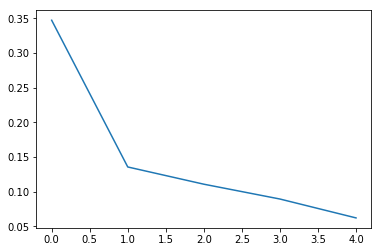

In [10]:
plt.plot(np.arange(pca.n_components_), pca.explained_variance_ratio_)

In [11]:
results.shape

(202709, 5)

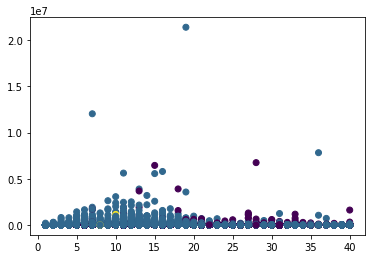

In [12]:
plt.scatter(data.active_months, data.avg_usd_sent, c=cl.labels_)

In [13]:
cl = cluster.KMeans().fit(results)

(-50, 50)

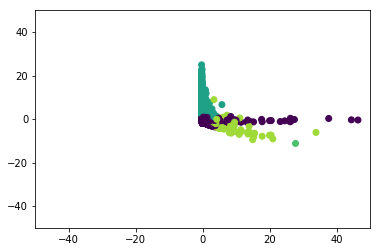

In [14]:
plt.scatter(results[:,0],results[:,1],c=cl.labels_)
plt.ylim(-50,50)
plt.xlim(-50,50)

In [15]:
silhouette_score(results, cl.labels_ )

0.6332072056631516

In [15]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=5))])

results = pipe.fit_transform(data.values)

/Users/will/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


For n_clusters = 6 The average silhouette_score is : 0.698606016966141


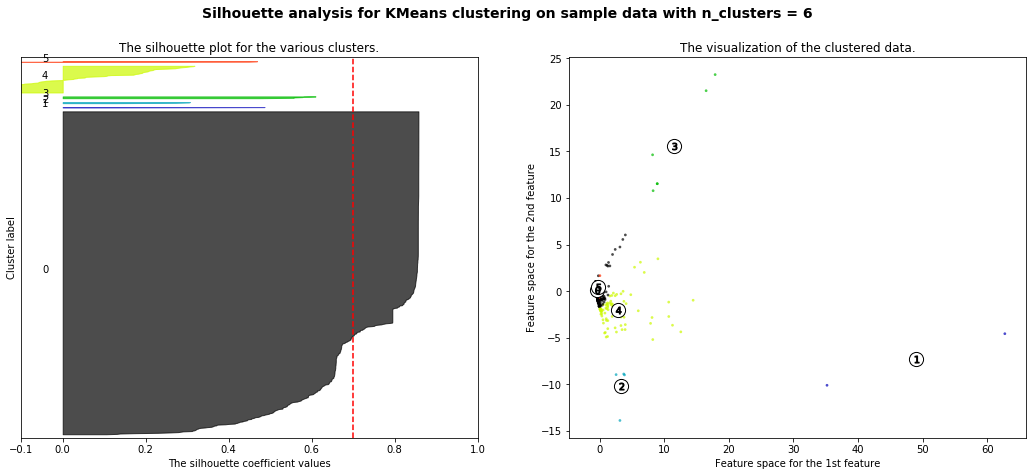

In [17]:

X=results





range_n_clusters = [6]

for n_clusters in range_n_clusters:
#     X=data
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #subset data so I don't kill computer
#     X=data[:100]
#     cluster_labels[:100]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [16]:
%run kmedians.py

<Figure size 432x288 with 0 Axes>

In [17]:
k = 4

#length of data
datapoints = len(results)
indices = [random.randint(0,datapoints-1) for i in range(k+1)]
initial_centers = results[indices]

km =  kmedians(results, initial_centers, ccore=False)



In [18]:
km.process()
clusters = km.get_clusters()

In [19]:
clusters = np.array([np.array(x) for x in clusters])

(-5, 1)

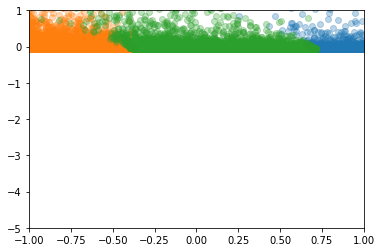

In [20]:
for i in range(k):
    plt.scatter(results[clusters[i]][:,1], results[clusters[i]][:,0], alpha=.3)
    
plt.xlim(-1,1)
plt.ylim(-5,1)

In [21]:
km.get_medians()

[[-0.06785560694185913,
  1.3967955642679648,
  0.0008700996990914867,
  0.018198216946313142,
  -0.005837685326441482],
 [-0.04366692310418526,
  -0.7896851165656515,
  -0.15384161309866945,
  0.11799726403321537,
  0.031643092631779494],
 [-0.053286959541144124,
  0.06074687183529801,
  -0.08965834961700227,
  0.07858713668647124,
  0.016888699943622618],
 [-0.028423351234909505,
  -1.4417249002160437,
  -0.18765160413474247,
  0.13808833131955878,
  -0.003838051937384755],
 [-0.09386506631958012,
  3.9301142849432935,
  0.1766444797226607,
  -0.10419545680633627,
  -0.04953131449836568]]

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

import kmedoids


# distance matrix
D = pairwise_distances(results, metric='euclidean')

# split into 4 clusters
M, C = kmedoids.kMedoids(D, 8)


# print('medoids:')
# for point_idx in M:
#     print( results[point_idx] )

# print('')
# print('clustering result:')
# for label in C:
#     for point_idx in C[label]:
#         print('label {0}:　{1}'.format(label, results[point_idx]))

In [ ]:
for lbl in C:
    a = results[C[lbl]]
    plt.scatter(a[:,0],a[:,1], label = lbl, alpha=.2)
plt.legend()
plt.xlim(0,20)
plt.ylim(-10,10)

In [ ]:
results.shape